In [60]:
#importing nevessary requirement for the task
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters
import seaborn as sns
%matplotlib inline
from sklearn.impute import KNNImputer


#reading the csv file and assign it to a variable called df

df = pd.read_csv('productdata.xlsx - Sheet1.csv')

## Exploratory Data analysis - EDA

In [61]:
#Total rows and columns in the dataset
df.shape

(3847, 6)

In [62]:
#looking at the dataset in a glance
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3847 entries, 0 to 3846
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRODUCTID      3847 non-null   int64  
 1   TITLE          3847 non-null   object 
 2   BULLET_POINTS  2256 non-null   object 
 3   DESCRIPTION    1703 non-null   object 
 4   PRODUCTTYPEID  3669 non-null   float64
 5   ProductLength  3669 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 180.5+ KB


In [63]:
#first 5 rows
df.head()

,PRODUCTID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCTTYPEID,ProductLength
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650.0,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755.0,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537.0,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996.0,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112.0,598.424000


In [64]:
#statistical view of the numerical columns in the dataset
df.describe()

,PRODUCTID,PRODUCTTYPEID,ProductLength
count,3.847000e+03,3669.000000,3669.000000
mean,1.456557e+06,3932.736986,1150.529020
std,8.666684e+05,3970.908660,2665.897894
min,1.303000e+03,0.000000,1.000000
25%,6.922785e+05,154.000000,507.873000
50%,1.441218e+06,2879.000000,640.000000
75%,2.214798e+06,6337.000000,1023.622046
max,2.999397e+06,13330.000000,96000.000000


In [65]:
#taking a quick view of the cardinality of each object column
print('df', '\n', df.select_dtypes('object').nunique())

df 
 TITLE            3541
BULLET_POINTS    2116
DESCRIPTION      1609
dtype: int64


# DATA CLEANING - MISSING VALUES 

In [66]:
# Identifying columns with missing values - checking the number of null values in each column
missing_values = {
    'PRODUCTID': df['PRODUCTID'].isna().sum(),
    'TITLE': df['TITLE'].isna().sum(),
    'BULLET_POINTS': df['BULLET_POINTS'].isna().sum(),
    'DESCRIPTION': df['DESCRIPTION'].isna().sum(),
    'PRODUCTTYPEID': df['PRODUCTTYPEID'].isna().sum(),
    'ProductLength': df['ProductLength'].isna().sum()
}

# Convert to DataFrame
missing_df = pd.DataFrame(list(missing_values.items()), columns=['columns', 'total_missing'])

# Display the DataFrame
print(missing_df)


         columns  total_missing
0      PRODUCTID              0
1          TITLE              0
2  BULLET_POINTS           1591
3    DESCRIPTION           2144
4  PRODUCTTYPEID            178
5  ProductLength            178


Text(0.5, 1.0, 'bar plot of missing values for each column in the DataSet')

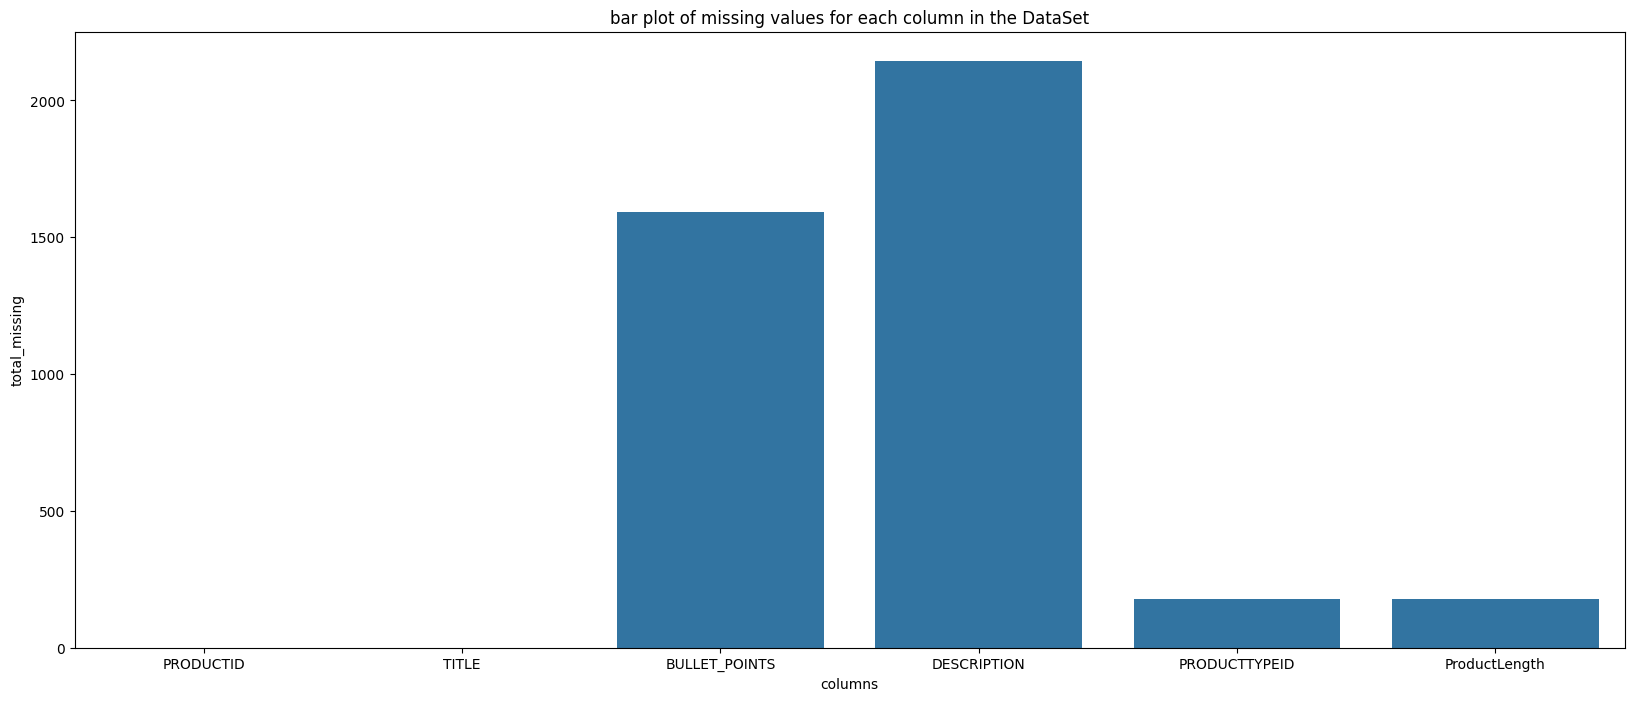

In [67]:
#displaying the barplot of the missing value
plt.figure(figsize=(20, 8))
sns.barplot(x='columns', y='total_missing', data=missing_df)
#adding a title
plt.title('bar plot of missing values for each column in the DataSet')

After identifying the missing values in the dataframe, it becomes crucial to identify a mothod of cleaning the data. among the method of data cleaning are:
1. droping rows or column.
2. imputation: filling in the missing values with mean, median, mode, or custom values.
3. An Extension to imputation (add a column that shows the location of the imputed values)


-ideally, I ought to use the both method, after which the result are used on a machine learning model and we select the method with the lowest *Mean absolute error(MAE)*
-However, this is a stage one project and so to keep thing simple and within the task scope, I will be cleaning the missing values using imputation since the categorical columns cardinality is high and numerical missing values is low.
categorical missing value - filled in with custom values such as notavailable.
numerical missing values - filled in with K-Nearest Neighbors (KNN) to find similar rows and impute missing values


In [68]:
#definng the categorical col with missing values to be cleaning
cat_with_missing = [cname for cname in df.columns 
                     if df[cname].dtype == 'object']
#filling in the missing values in categorical variables with not available
df[cat_with_missing] = df[cat_with_missing].fillna('Not Available')

Text(0.5, 1.0, 'bar plot of missing values for each column in the DataSet')

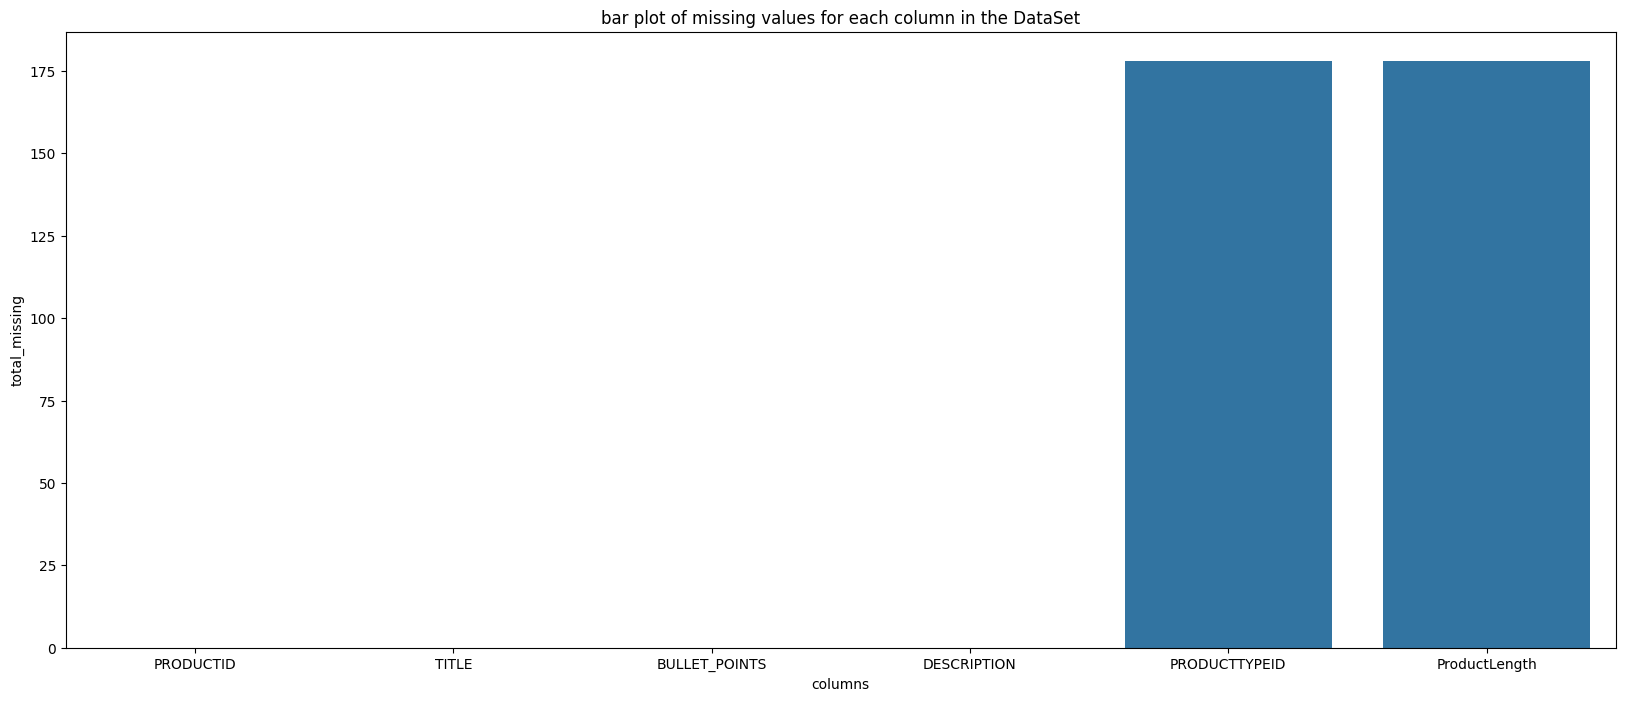

In [69]:
# Identifying columns with missing values - checking the number of null values in each column
missing_values = {
    'PRODUCTID': df['PRODUCTID'].isna().sum(),
    'TITLE': df['TITLE'].isna().sum(),
    'BULLET_POINTS': df['BULLET_POINTS'].isna().sum(),
    'DESCRIPTION': df['DESCRIPTION'].isna().sum(),
    'PRODUCTTYPEID': df['PRODUCTTYPEID'].isna().sum(),
    'ProductLength': df['ProductLength'].isna().sum()
}

# Convert to DataFrame
missing_df = pd.DataFrame(list(missing_values.items()), columns=['columns', 'total_missing'])

#displaying the barplot of the missing value
plt.figure(figsize=(20, 8))
sns.barplot(x='columns', y='total_missing', data=missing_df)
#adding a title
plt.title('bar plot of missing values for each column in the DataSet')

In [70]:
#looking at the dataset after cleaning the categorical column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3847 entries, 0 to 3846
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRODUCTID      3847 non-null   int64  
 1   TITLE          3847 non-null   object 
 2   BULLET_POINTS  3847 non-null   object 
 3   DESCRIPTION    3847 non-null   object 
 4   PRODUCTTYPEID  3669 non-null   float64
 5   ProductLength  3669 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 180.5+ KB


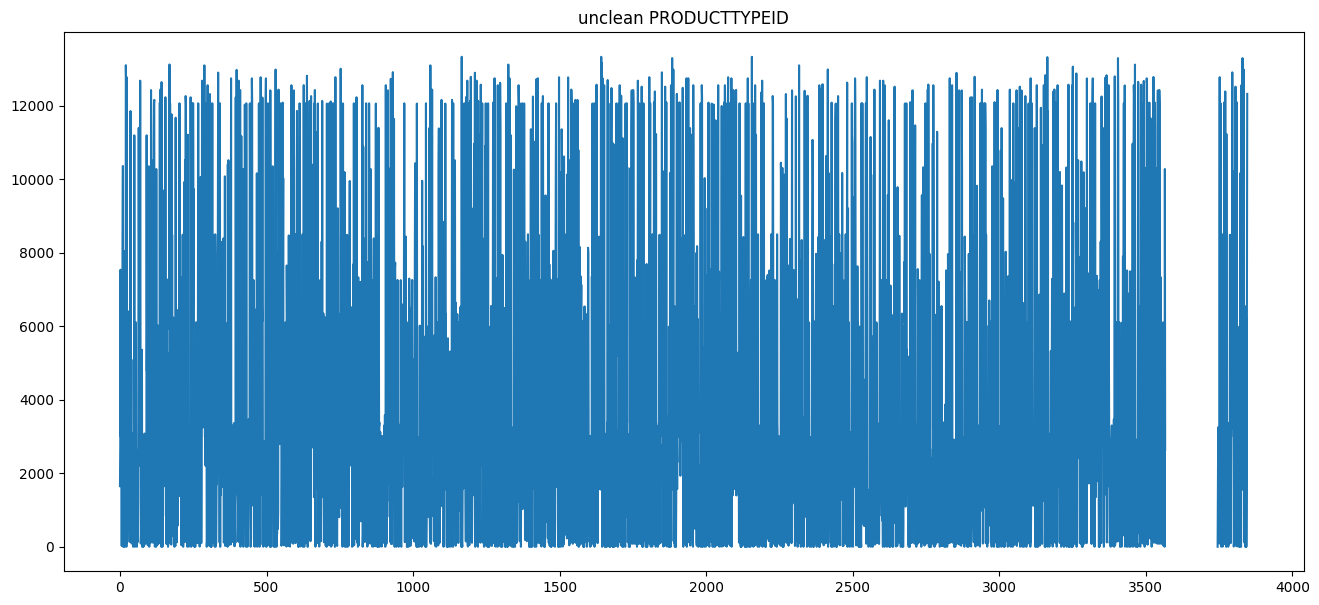

In [71]:
#plotting the numerical columns to understand the best imputation strategy to use.
df.PRODUCTTYPEID.plot(figsize=(16,7))
plt.title('unclean PRODUCTTYPEID')
fig2 = plt.gcf()
fig2.savefig('pI.png')
plt.show()

<Axes: >

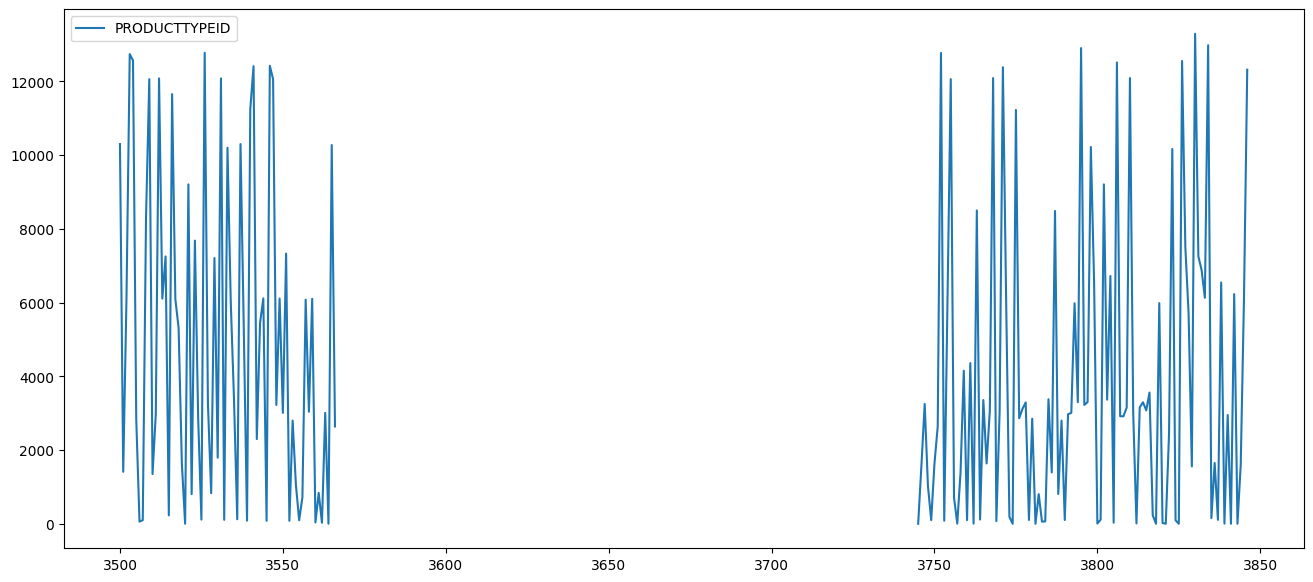

In [72]:
#Zooming in the noticable break in the PRODUCTTYPEID chat
df.loc[3500:, ['PRODUCTTYPEID']].plot(figsize=(16,7))

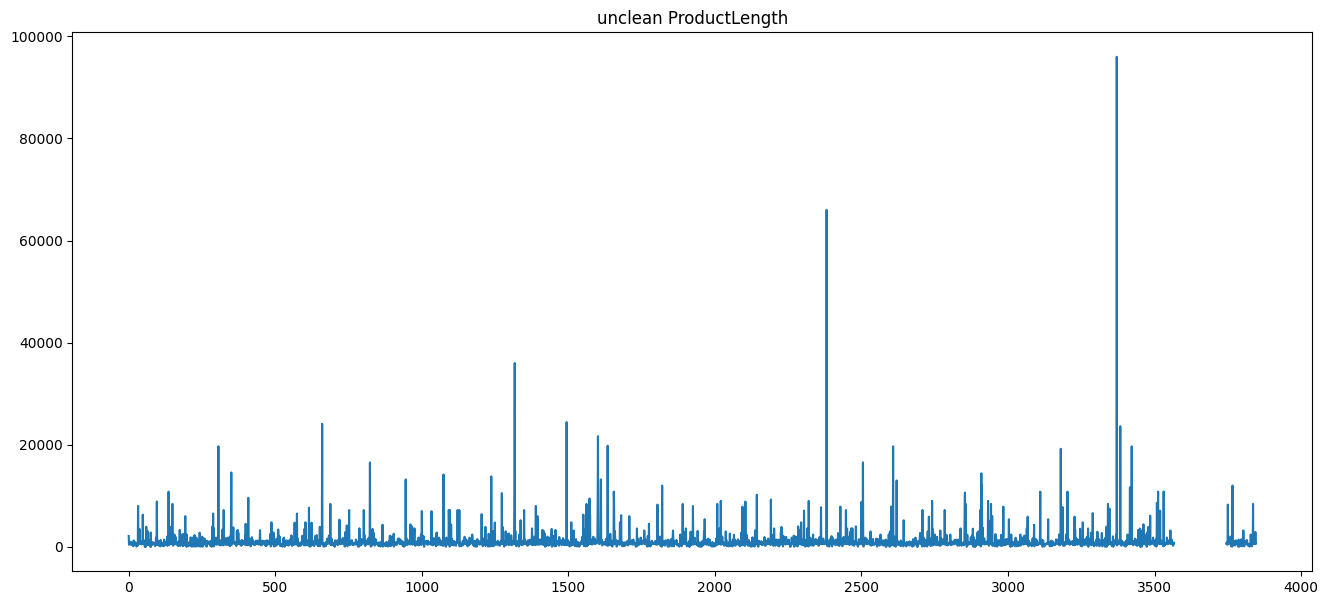

In [73]:
#plotting the numerical columns to understand the best imputation strategy to use.
df.ProductLength.plot(figsize=(16,7))
plt.title('unclean ProductLength')
fig2 = plt.gcf()
fig2.savefig('pl.png')
plt.show()

<Axes: >

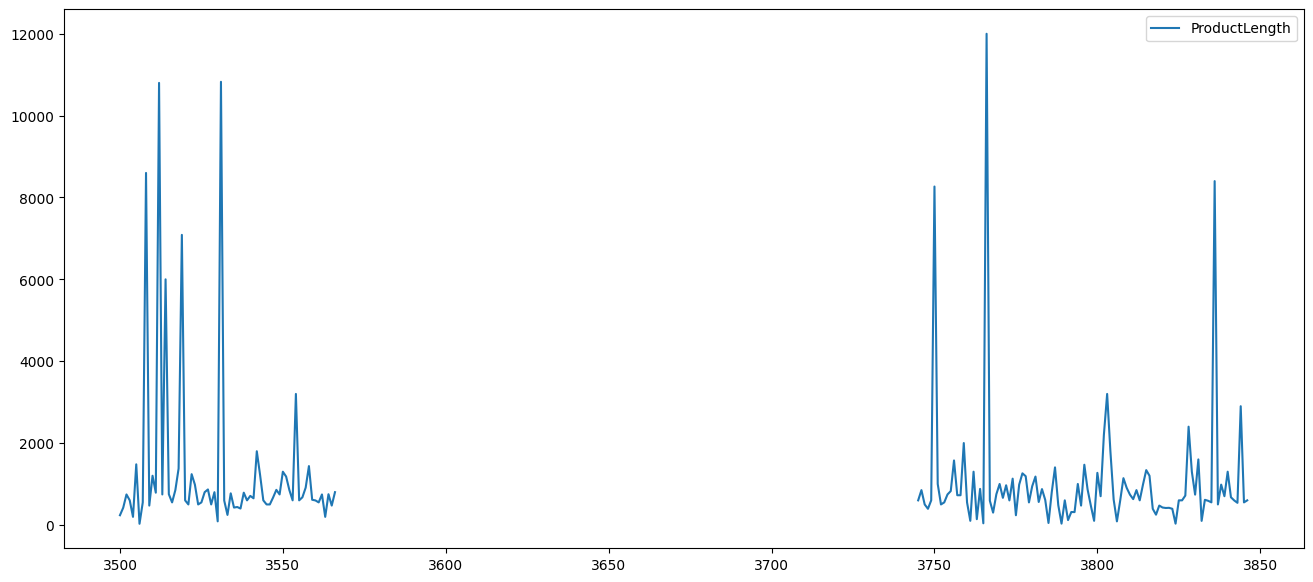

In [74]:
#Zooming in the noticable break in the chat
df.loc[3500:, ['ProductLength']].plot(figsize=(16,7))

In [75]:
# Identify numerical columns with missing values
num_with_missing = [cname for cname in df.columns 
                     if df[cname].dtype == 'float64']

# Initialize KNN Imputer
imputer = KNNImputer(n_neighbors=5)

# Apply imputer to selected numerical columns
df[num_with_missing] = imputer.fit_transform(df[num_with_missing])

In [76]:
#checking the changes in the statistical properties after imputation
df.describe()

,PRODUCTID,PRODUCTTYPEID,ProductLength
count,3.847000e+03,3847.000000,3847.000000
mean,1.456557e+06,3932.736986,1150.529020
std,8.666684e+05,3877.929603,2603.475740
min,1.303000e+03,0.000000,1.000000
25%,6.922785e+05,244.000000,530.000000
50%,1.441218e+06,2971.000000,669.291338
75%,2.214798e+06,6144.500000,1150.529020
max,2.999397e+06,13330.000000,96000.000000


In [77]:
#looking at the dataset after cleaning the missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3847 entries, 0 to 3846
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRODUCTID      3847 non-null   int64  
 1   TITLE          3847 non-null   object 
 2   BULLET_POINTS  3847 non-null   object 
 3   DESCRIPTION    3847 non-null   object 
 4   PRODUCTTYPEID  3847 non-null   float64
 5   ProductLength  3847 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 180.5+ KB


Text(0.5, 1.0, 'bar plot of missing values for each column in the DataSet')

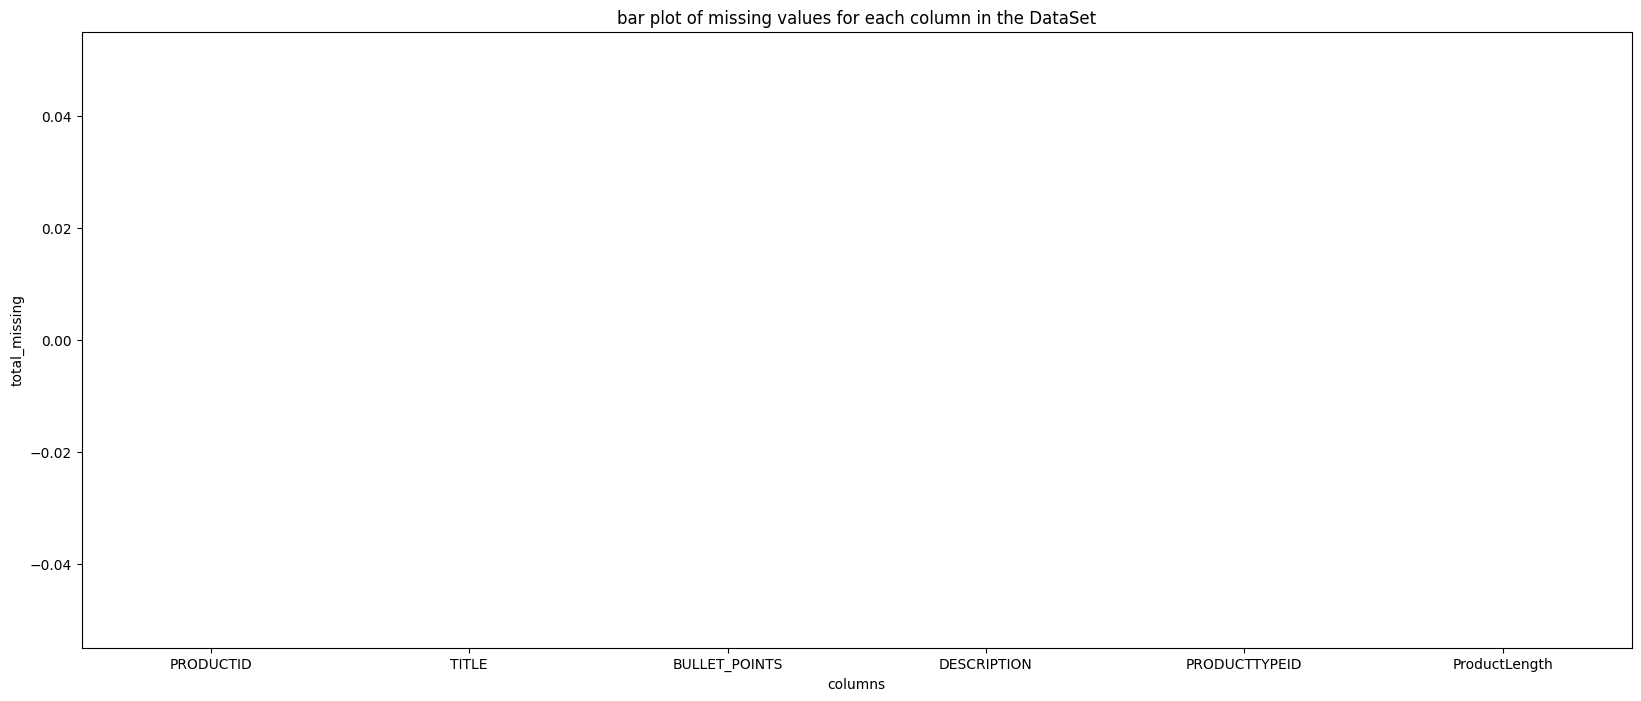

In [78]:
# Identifying columns with missing values - checking the number of null values in each column
missing_values = {
    'PRODUCTID': df['PRODUCTID'].isna().sum(),
    'TITLE': df['TITLE'].isna().sum(),
    'BULLET_POINTS': df['BULLET_POINTS'].isna().sum(),
    'DESCRIPTION': df['DESCRIPTION'].isna().sum(),
    'PRODUCTTYPEID': df['PRODUCTTYPEID'].isna().sum(),
    'ProductLength': df['ProductLength'].isna().sum()
}

# Convert to DataFrame
missing_df = pd.DataFrame(list(missing_values.items()), columns=['columns', 'total_missing'])

#displaying the barplot of the missing value
plt.figure(figsize=(20, 8))
sns.barplot(x='columns', y='total_missing', data=missing_df)
#adding a title
plt.title('bar plot of missing values for each column in the DataSet')

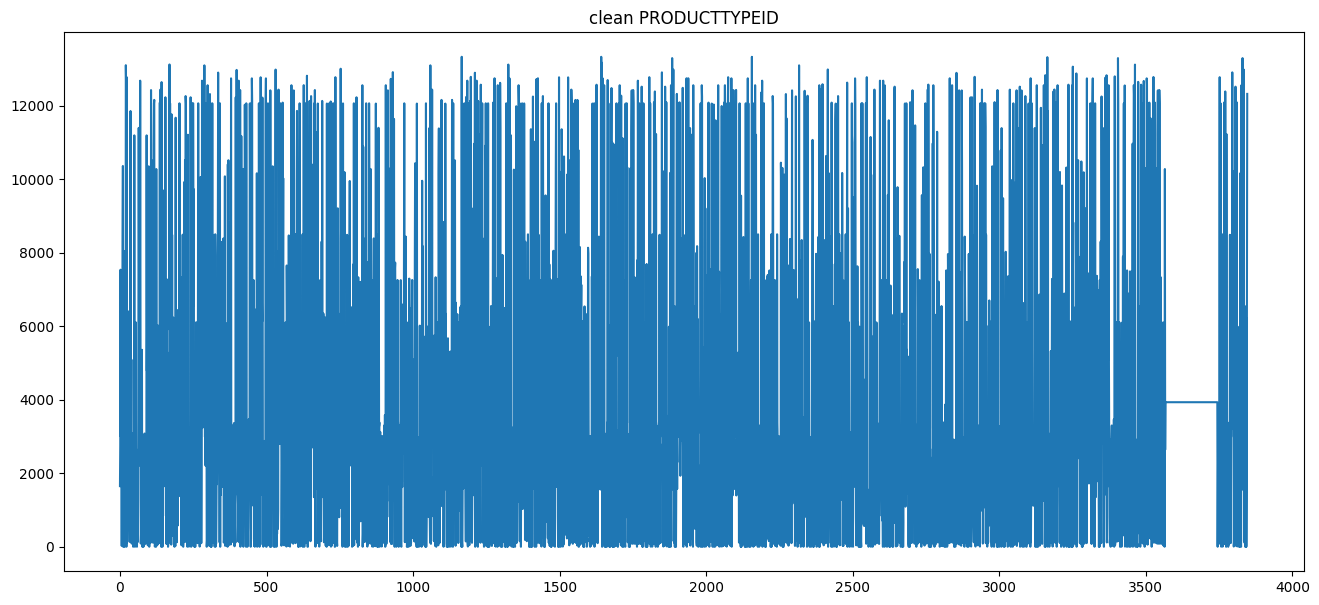

In [79]:
#plotting the numerical columns after filling in the missing values
df.PRODUCTTYPEID.plot(figsize=(16,7))
plt.title('clean PRODUCTTYPEID')
fig2 = plt.gcf()
fig2.savefig('pi1.png')
plt.show()

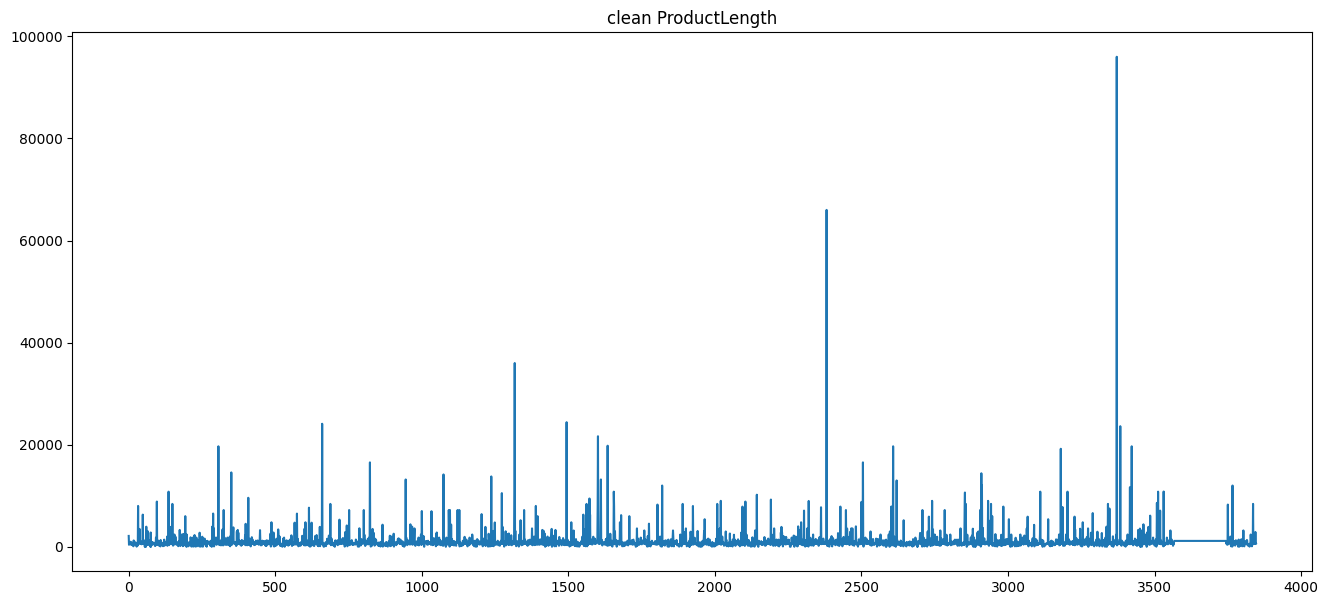

In [80]:
#plotting the numerical columns after filling in the missing values
df.ProductLength.plot(figsize=(16,7))
plt.title('clean ProductLength')
fig2 = plt.gcf()
fig2.savefig('pl.png')
plt.show()

# DATA CLEANING - DUPLICATE

In [81]:
#checking for duplicate rows in the column
print("Number of duplicate rows:", df.duplicated(keep='first').sum())

Number of duplicate rows: 217


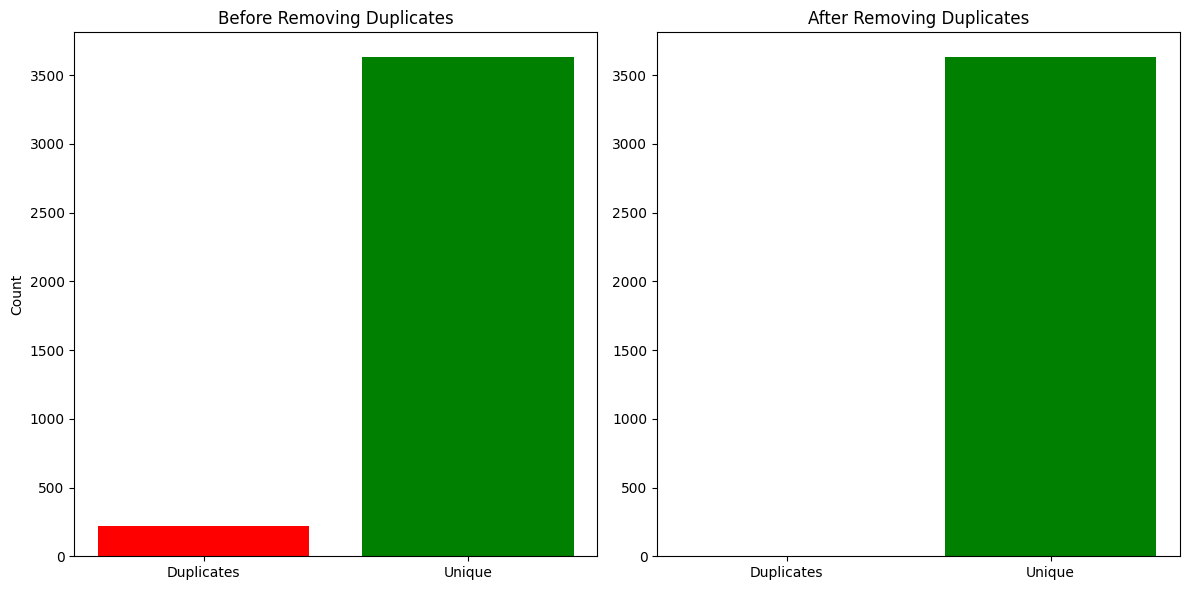

In [82]:
# Count before removing duplicates
duplicates_before = df.duplicated(keep='first').sum()
unique_before = len(df) - duplicates_before

# Remove duplicates
df.drop_duplicates(keep='first', inplace=True)

# Count after removing duplicates
duplicates_after = df.duplicated(keep='first').sum()
unique_after = len(df) - duplicates_after

# Plotting the comparison
labels = ['Duplicates', 'Unique']
before_counts = [duplicates_before, unique_before]
after_counts = [duplicates_after, unique_after]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Before removal
ax[0].bar(labels, before_counts, color=['red', 'green'])
ax[0].set_title('Before Removing Duplicates')
ax[0].set_ylabel('Count')

# After removal
ax[1].bar(labels, after_counts, color=['red', 'green'])
ax[1].set_title('After Removing Duplicates')

plt.tight_layout()
plt.show()


In [83]:
#checking for duplicate rows in the column
print("Number of duplicate rows:", df.duplicated(keep='first').sum())

Number of duplicate rows: 0


In [84]:
#looking at the dataset after dropping the duplicate
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 3655
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRODUCTID      3630 non-null   int64  
 1   TITLE          3630 non-null   object 
 2   BULLET_POINTS  3630 non-null   object 
 3   DESCRIPTION    3630 non-null   object 
 4   PRODUCTTYPEID  3630 non-null   float64
 5   ProductLength  3630 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 198.5+ KB


In [85]:
#looking at the statistical difference after dropping the duplicates
df.describe()

,PRODUCTID,PRODUCTTYPEID,ProductLength
count,3.630000e+03,3630.000000,3630.000000
mean,1.458613e+06,3927.540934,1155.292685
std,8.681912e+05,3917.641048,2665.998840
min,1.303000e+03,0.000000,1.000000
25%,6.919762e+05,225.250000,521.655250
50%,1.442706e+06,2916.000000,663.500000
75%,2.217074e+06,6313.000000,1100.000000
max,2.999397e+06,13330.000000,96000.000000


# DATA CLEANING - Standardizing Column Names

In [86]:
# Standardizing column names to lowercase and adding underscore where necessary
df.columns = df.columns.str.lower().str.replace('productid', 'product_id') \
                         .str.replace('producttypeid', 'product_type_id') \
                         .str.replace('productlength', 'product_length')

In [87]:
#looking at the dataframe after standarzing the column names
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 3655
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       3630 non-null   int64  
 1   title            3630 non-null   object 
 2   bullet_points    3630 non-null   object 
 3   description      3630 non-null   object 
 4   product_type_id  3630 non-null   float64
 5   product_length   3630 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 198.5+ KB


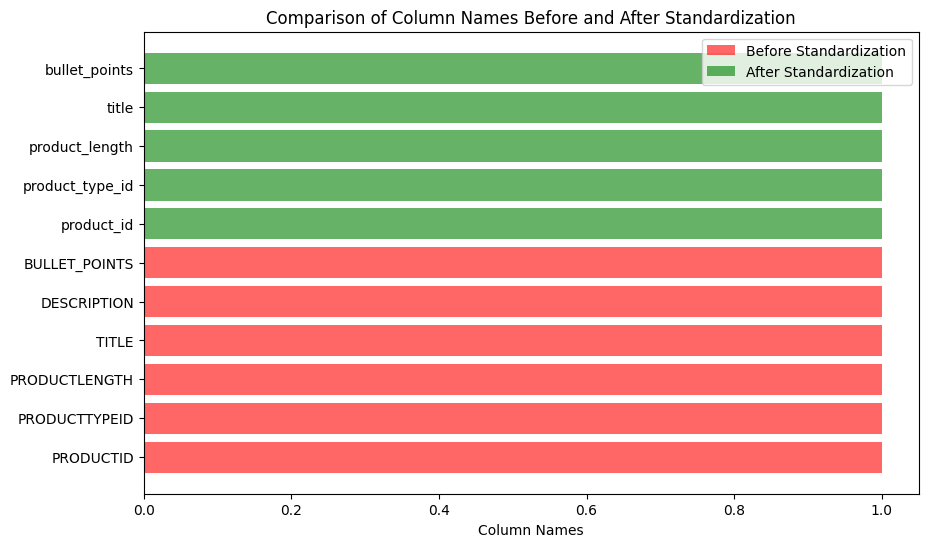

In [88]:
# Old column names and their new names
old_columns = ['PRODUCTID', 'PRODUCTTYPEID', 'PRODUCTLENGTH', 'TITLE', 'DESCRIPTION', 'BULLET_POINTS' ]
new_columns = ['product_id', 'product_type_id', 'product_length', 'title', 'bullet_points']

# Plotting
plt.figure(figsize=(10, 6))

# Before and after plot
plt.barh(old_columns, [1] * len(old_columns), color='red', alpha=0.6, label='Before Standardization')
plt.barh(new_columns, [1] * len(new_columns), color='green', alpha=0.6, label='After Standardization')

plt.xlabel('Column Names')
plt.title('Comparison of Column Names Before and After Standardization')
plt.legend(loc='upper right')

plt.show()

# DATA CLEANING - inconsistencies AND OUTLIERS

Text(0.5, 1.0, 'product_length')

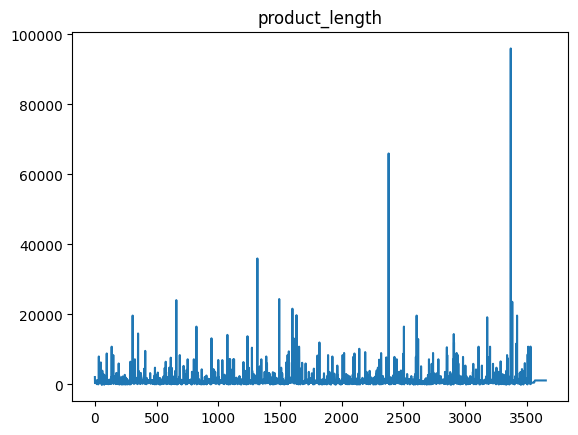

In [89]:
#ploting the numerical columns to see if there are outliers
df['product_length'].plot()
plt.title('product_length')

Text(0.5, 1.0, 'product_id')

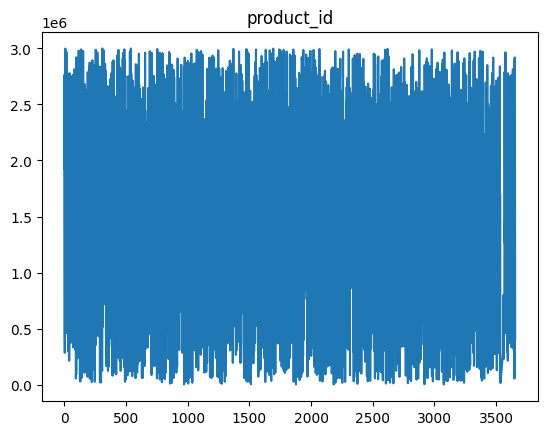

In [90]:
#ploting the numerical columns to see if there are outliers or inconsistent values
df['product_id'].plot()
plt.title('product_id')

Text(0.5, 1.0, 'product_type_id')

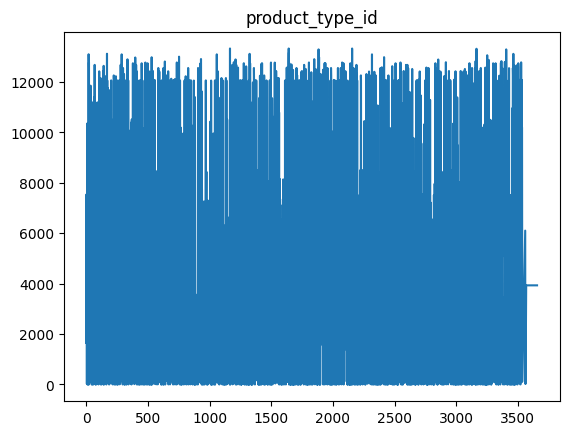

In [91]:
#ploting the numerical columns to see if there are outliers or inconsistent values
df['product_type_id'].plot()
plt.title('product_type_id')

<Axes: >

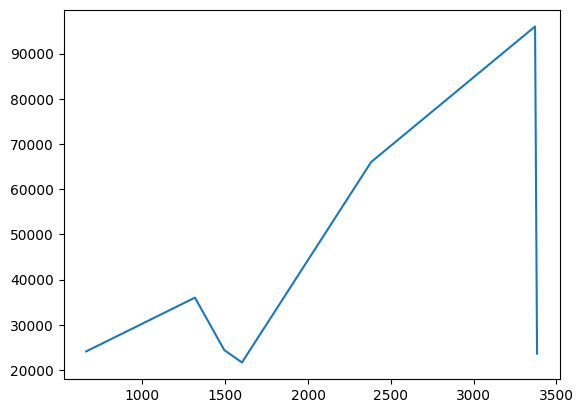

In [92]:
#zooming into the outliers and inconsistent values in product length 
cond = (df['product_length'] > 20000)
df['product_length'].loc[cond].plot()

In [93]:
#zooming into the outliers and inconsistent values in product length 
cond = (df['product_length'] > 20000)
df['product_length'].loc[cond].value_counts()

product_length
24100.0    1
36000.0    1
24409.4    1
21653.5    1
66000.0    1
96000.0    1
23622.0    1
Name: count, dtype: int64

In [94]:
#5. cleaning invalid values and outliers
#the interquartile range is a good measure of centered dispersion and it is not sensitive to outliers
iqr = df['product_length'].quantile(.25) - df['product_length'].quantile(.75)
lowerlimit = df['product_length'].mean()-2 * iqr
upperlimit = df['product_length'].mean()+2 * iqr
print(upperlimit)
print(lowerlimit)


-1.3968146877475647
2311.982185312252


In [95]:
upperlimit

-1.3968146877475647

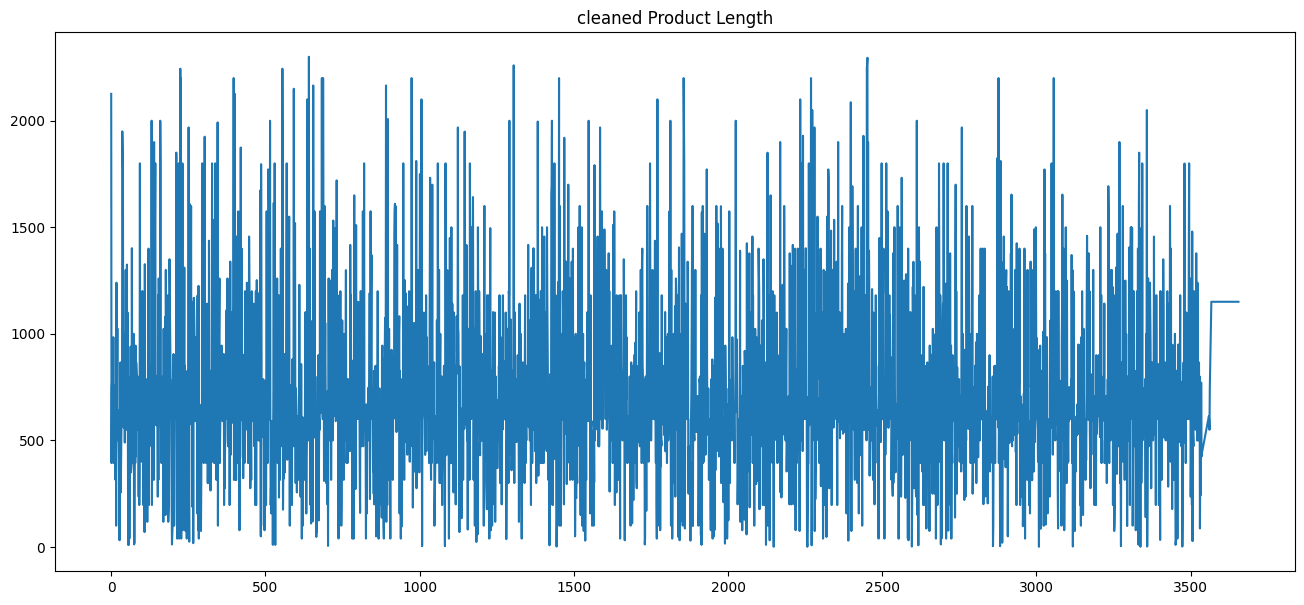

In [96]:
# Define the condition correctly
cond = (df['product_length'] > upperlimit) & (df['product_length'] < lowerlimit)

# Filter DataFrame using the corrected condition
df1 = df.loc[cond]

# Plot product_length
df1['product_length'].plot(figsize=(16, 7))
plt.title('cleaned Product Length')

# Save the figure
fig3 = plt.gcf()
fig3.savefig('clean_product_length.png')

# Show the plot
plt.show()

In [97]:
# Define the condition for outliers
cond = (df['product_length'] > upperlimit) & (df['product_length'] < lowerlimit)

# keep only non-outliers
df = df[cond]

# Reset the index after dropping
df.reset_index(drop=True, inplace=True)

#looking at the dataframe after dropping the outliers and inconsistencies
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3359 entries, 0 to 3358
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       3359 non-null   int64  
 1   title            3359 non-null   object 
 2   bullet_points    3359 non-null   object 
 3   description      3359 non-null   object 
 4   product_type_id  3359 non-null   float64
 5   product_length   3359 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 157.6+ KB


In [98]:
#looking at the stastical difference of this effect
df.describe()

,product_id,product_type_id,product_length
count,3.359000e+03,3359.000000,3359.000000
mean,1.425476e+06,3836.778682,734.362483
std,8.798367e+05,3931.671908,407.846727
min,1.303000e+03,0.000000,1.000000
25%,6.474105e+05,143.000000,500.000000
50%,1.385458e+06,2879.000000,614.000000
75%,2.206409e+06,6130.000000,942.440000
max,2.999397e+06,13330.000000,2300.000000


## SHORT TITLE FEATURE

In [99]:
#function to extract first 3 and last 3 words
def extract_words(text):
    words = text.split()
    first_three = " ".join(words[:3])  # Get first three words
    last_three = " ".join(words[-2:])  # Get last two words
    return f"{first_three} - {last_three}"

# Apply function to create a new column
df['short_title'] = df['title'].apply(extract_words)

# Display the first 5 result
df.head(2)

,product_id,title,bullet_points,description,product_type_id,product_length,short_title
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,Not Available,1650.0,2125.98,ArtzFolio Tulip Flowers - 2 PCS
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",Not Available,2755.0,393.70,Marks & Spencer - T86_2561C_Navy Mix_9-10Y


In [100]:
#looking at the dataset after short title
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3359 entries, 0 to 3358
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       3359 non-null   int64  
 1   title            3359 non-null   object 
 2   bullet_points    3359 non-null   object 
 3   description      3359 non-null   object 
 4   product_type_id  3359 non-null   float64
 5   product_length   3359 non-null   float64
 6   short_title      3359 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 183.8+ KB


## Saving the Cleaned Data

In [101]:
df.to_csv('Data_product_clean.csv')

In [103]:
conclusion = {
    "Metrics": ["product_type_id_after", "product_length_after",
                "product_type_id_before", "product_length_before"],
    "count": [3359, 3359, 3669, 3669],
    "mean": [3837, 734, 3932, 1151],
    "std": [3932, 408, 3971, 2666],
    "min": [0, 1, 0, 1],
    "25%": [143, 500, 154, 509],
    "50%": [2879, 614, 2879, 640],
    "75%": [6130, 942, 6337, 1024],
    "max": [13330, 2300, 13330, 96000]
}

df1 = pd.DataFrame(conclusion)

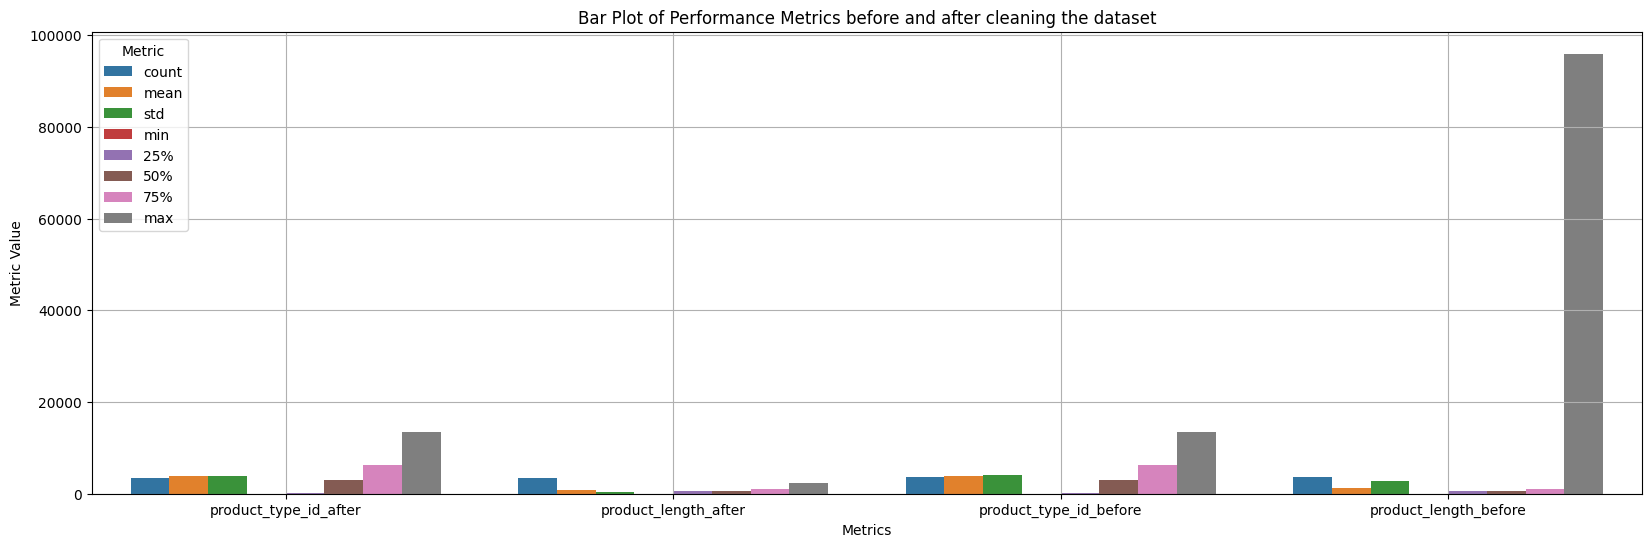

In [105]:
import seaborn as sns
#removing the future warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Create a figure with a specific size 
plt.figure(figsize=(20, 6))

# Reshaping the DataFrame from wide to long format
df_melted = df1.melt(id_vars= ["Metrics"], var_name='metric', value_name='value')

#creating the barplot using seaborn
sns.barplot(data=df_melted, x="Metrics", y='value', hue='metric')

plt.title("Bar Plot of Performance Metrics before and after cleaning the dataset")
# Label the x-axis
plt.xlabel("Metrics")
# Label the y-axis
plt.ylabel("Metric Value")
# Add a legend to the plot
plt.legend(title="Metric")
# Enable a grid on the plot for better readability
plt.grid(True)
# Display the plot
plt.show()